In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [2]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

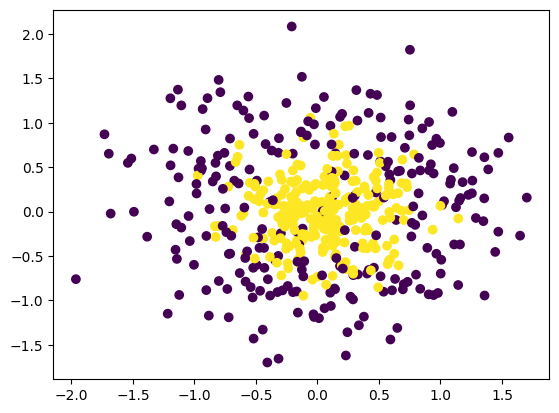

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier(algorithm='SAMME')

np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

np.float64(0.812)

In [5]:
abc.fit(X,y)

AdaBoostClassifier(algorithm='SAMME')

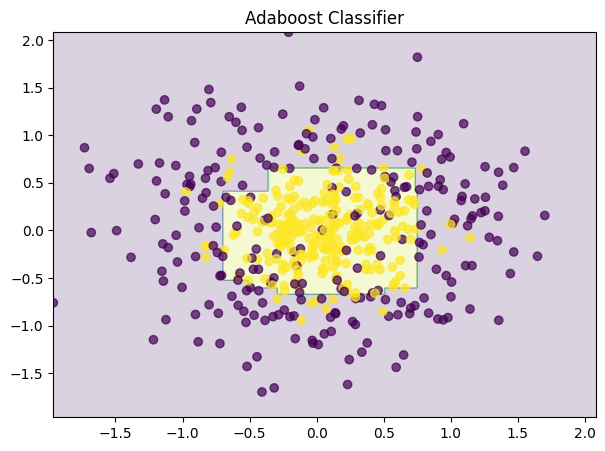

In [18]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(7, 5))
    x_range = np.linspace(X.min(), X.max(), 300)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(abc)

## only one decision stump - only one split

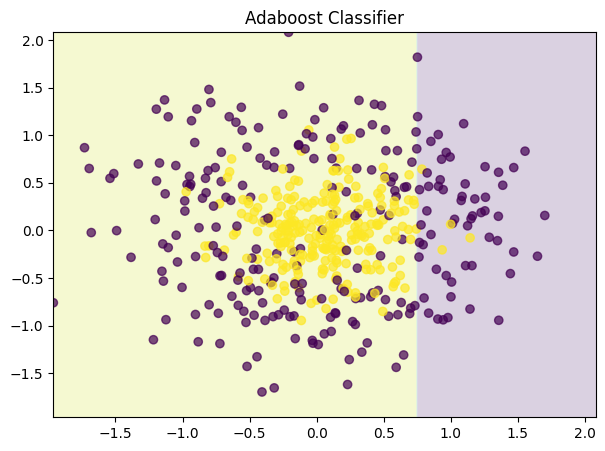

In [19]:
abc = AdaBoostClassifier(n_estimators=1, algorithm='SAMME')    
abc.fit(X,y)
plot_decision_boundary(abc)

## Increasing number of estimators increases overfitting

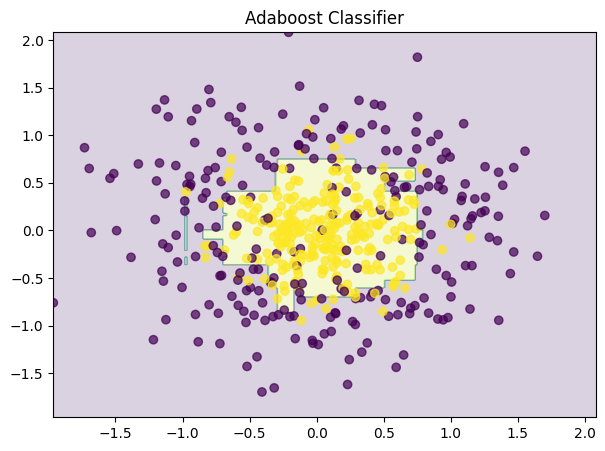

In [20]:
abc = AdaBoostClassifier(n_estimators=1500, algorithm='SAMME')
abc.fit(X,y)
plot_decision_boundary(abc)

## The overfitting can be compensated by reducing the learning rate

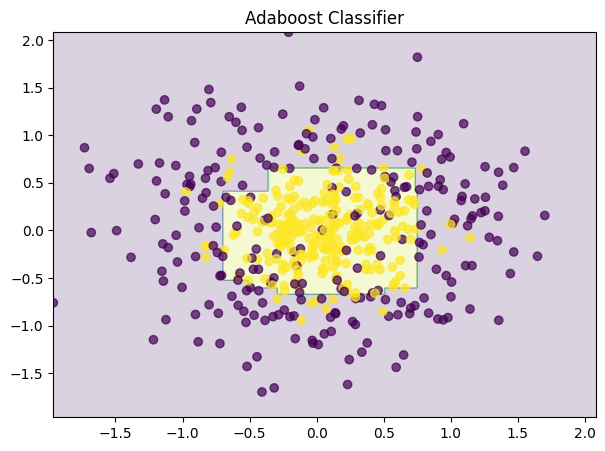

In [21]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1, algorithm='SAMME')
abc.fit(X,y)
plot_decision_boundary(abc)

## Hyperparameter tuning using Grid Search CV

In [17]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]


grid_search = GridSearchCV(estimator=AdaBoostClassifier(algorithm='SAMME'), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.832000 using {'learning_rate': 0.1, 'n_estimators': 500}


# Link
https://stats.stackexchange.com/questions/82323/shrinkage-parameter-in-adaboost